In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64


5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64


0.03780    2
0.03751    2
0.04394    2
0

In [6]:
data["Happiness Score"].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
oe=OrdinalEncoder()

In [10]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))

In [11]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [12]:
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:xlabel='Happiness Score', ylabel='count'>

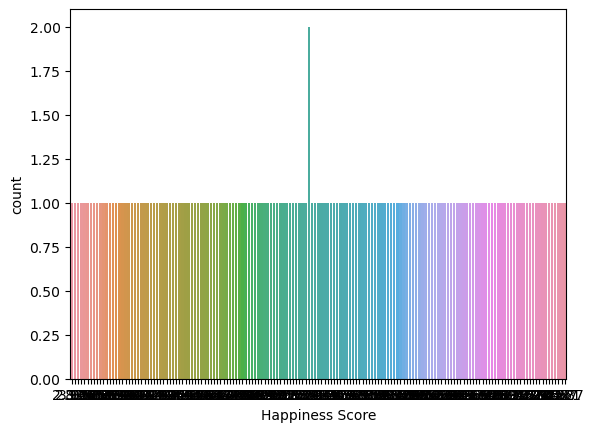

In [13]:
sns.countplot(x='Happiness Score',data=data)

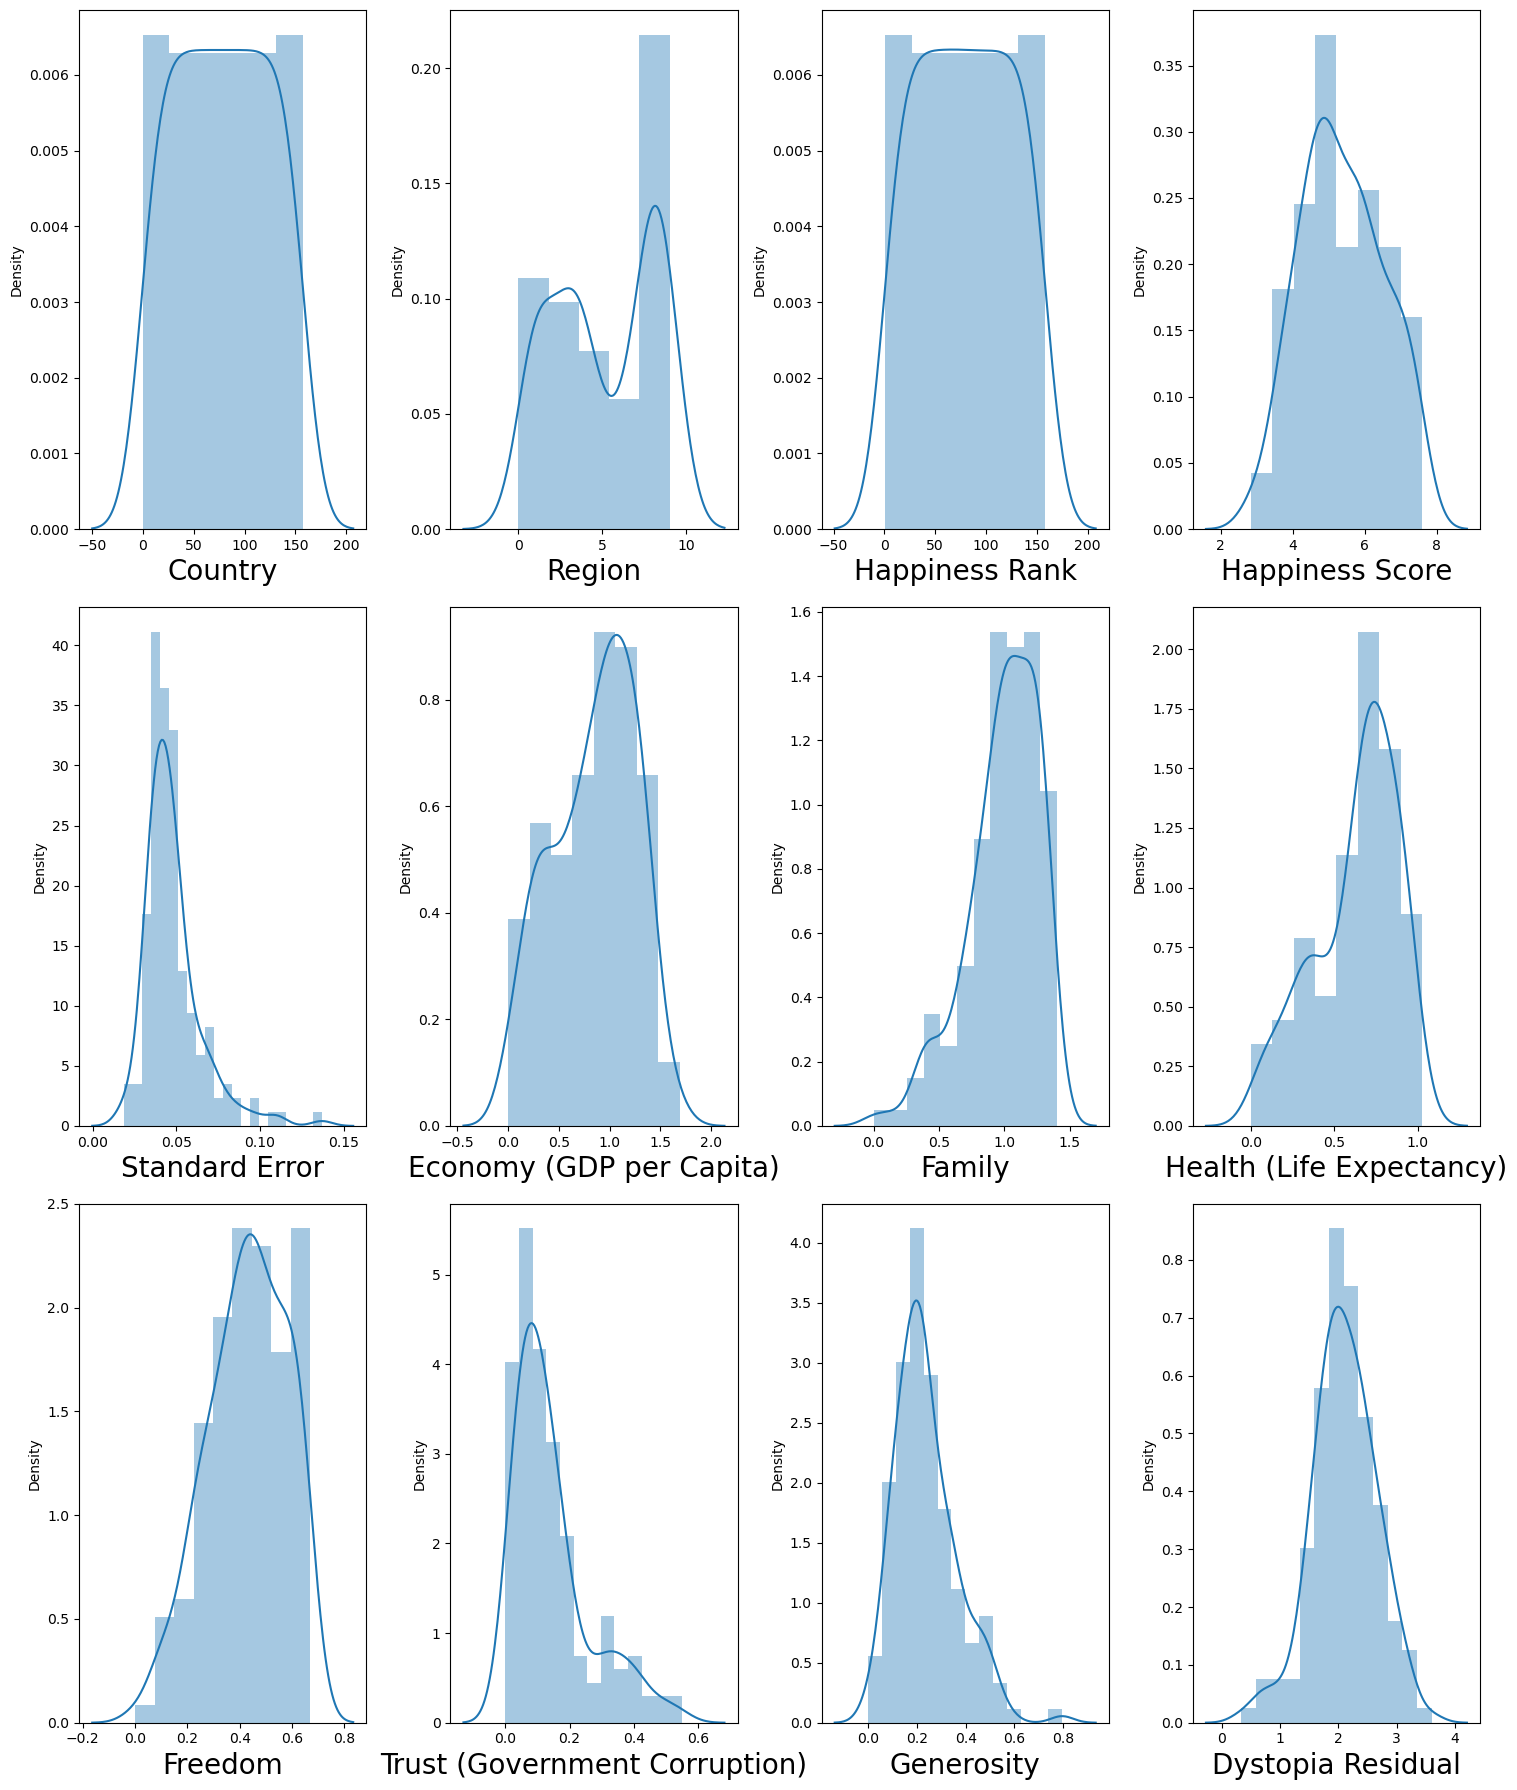

In [14]:
plt.figure(figsize=(15,18),facecolor="w")
graph=1
for i in data:
    if graph<=13:
        ax=plt.subplot(3,4,graph)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    graph+=1
plt.tight_layout()

In [15]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [16]:
data.rename(columns={"Happiness Rank":"Happiness_Rank","Happiness Score":"Happiness_Score","Standard Error":"Standard_Error","Economy (GDP per Capita)":"Economy_GDP_per_Capita","Health (Life Expectancy)":"Health_Life_Expectancy","Trust (Government Corruption)":"Trust_Government_Corruption","Dystopia Residual":"Dystopia_Residual"},inplace=True)

In [17]:
data.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

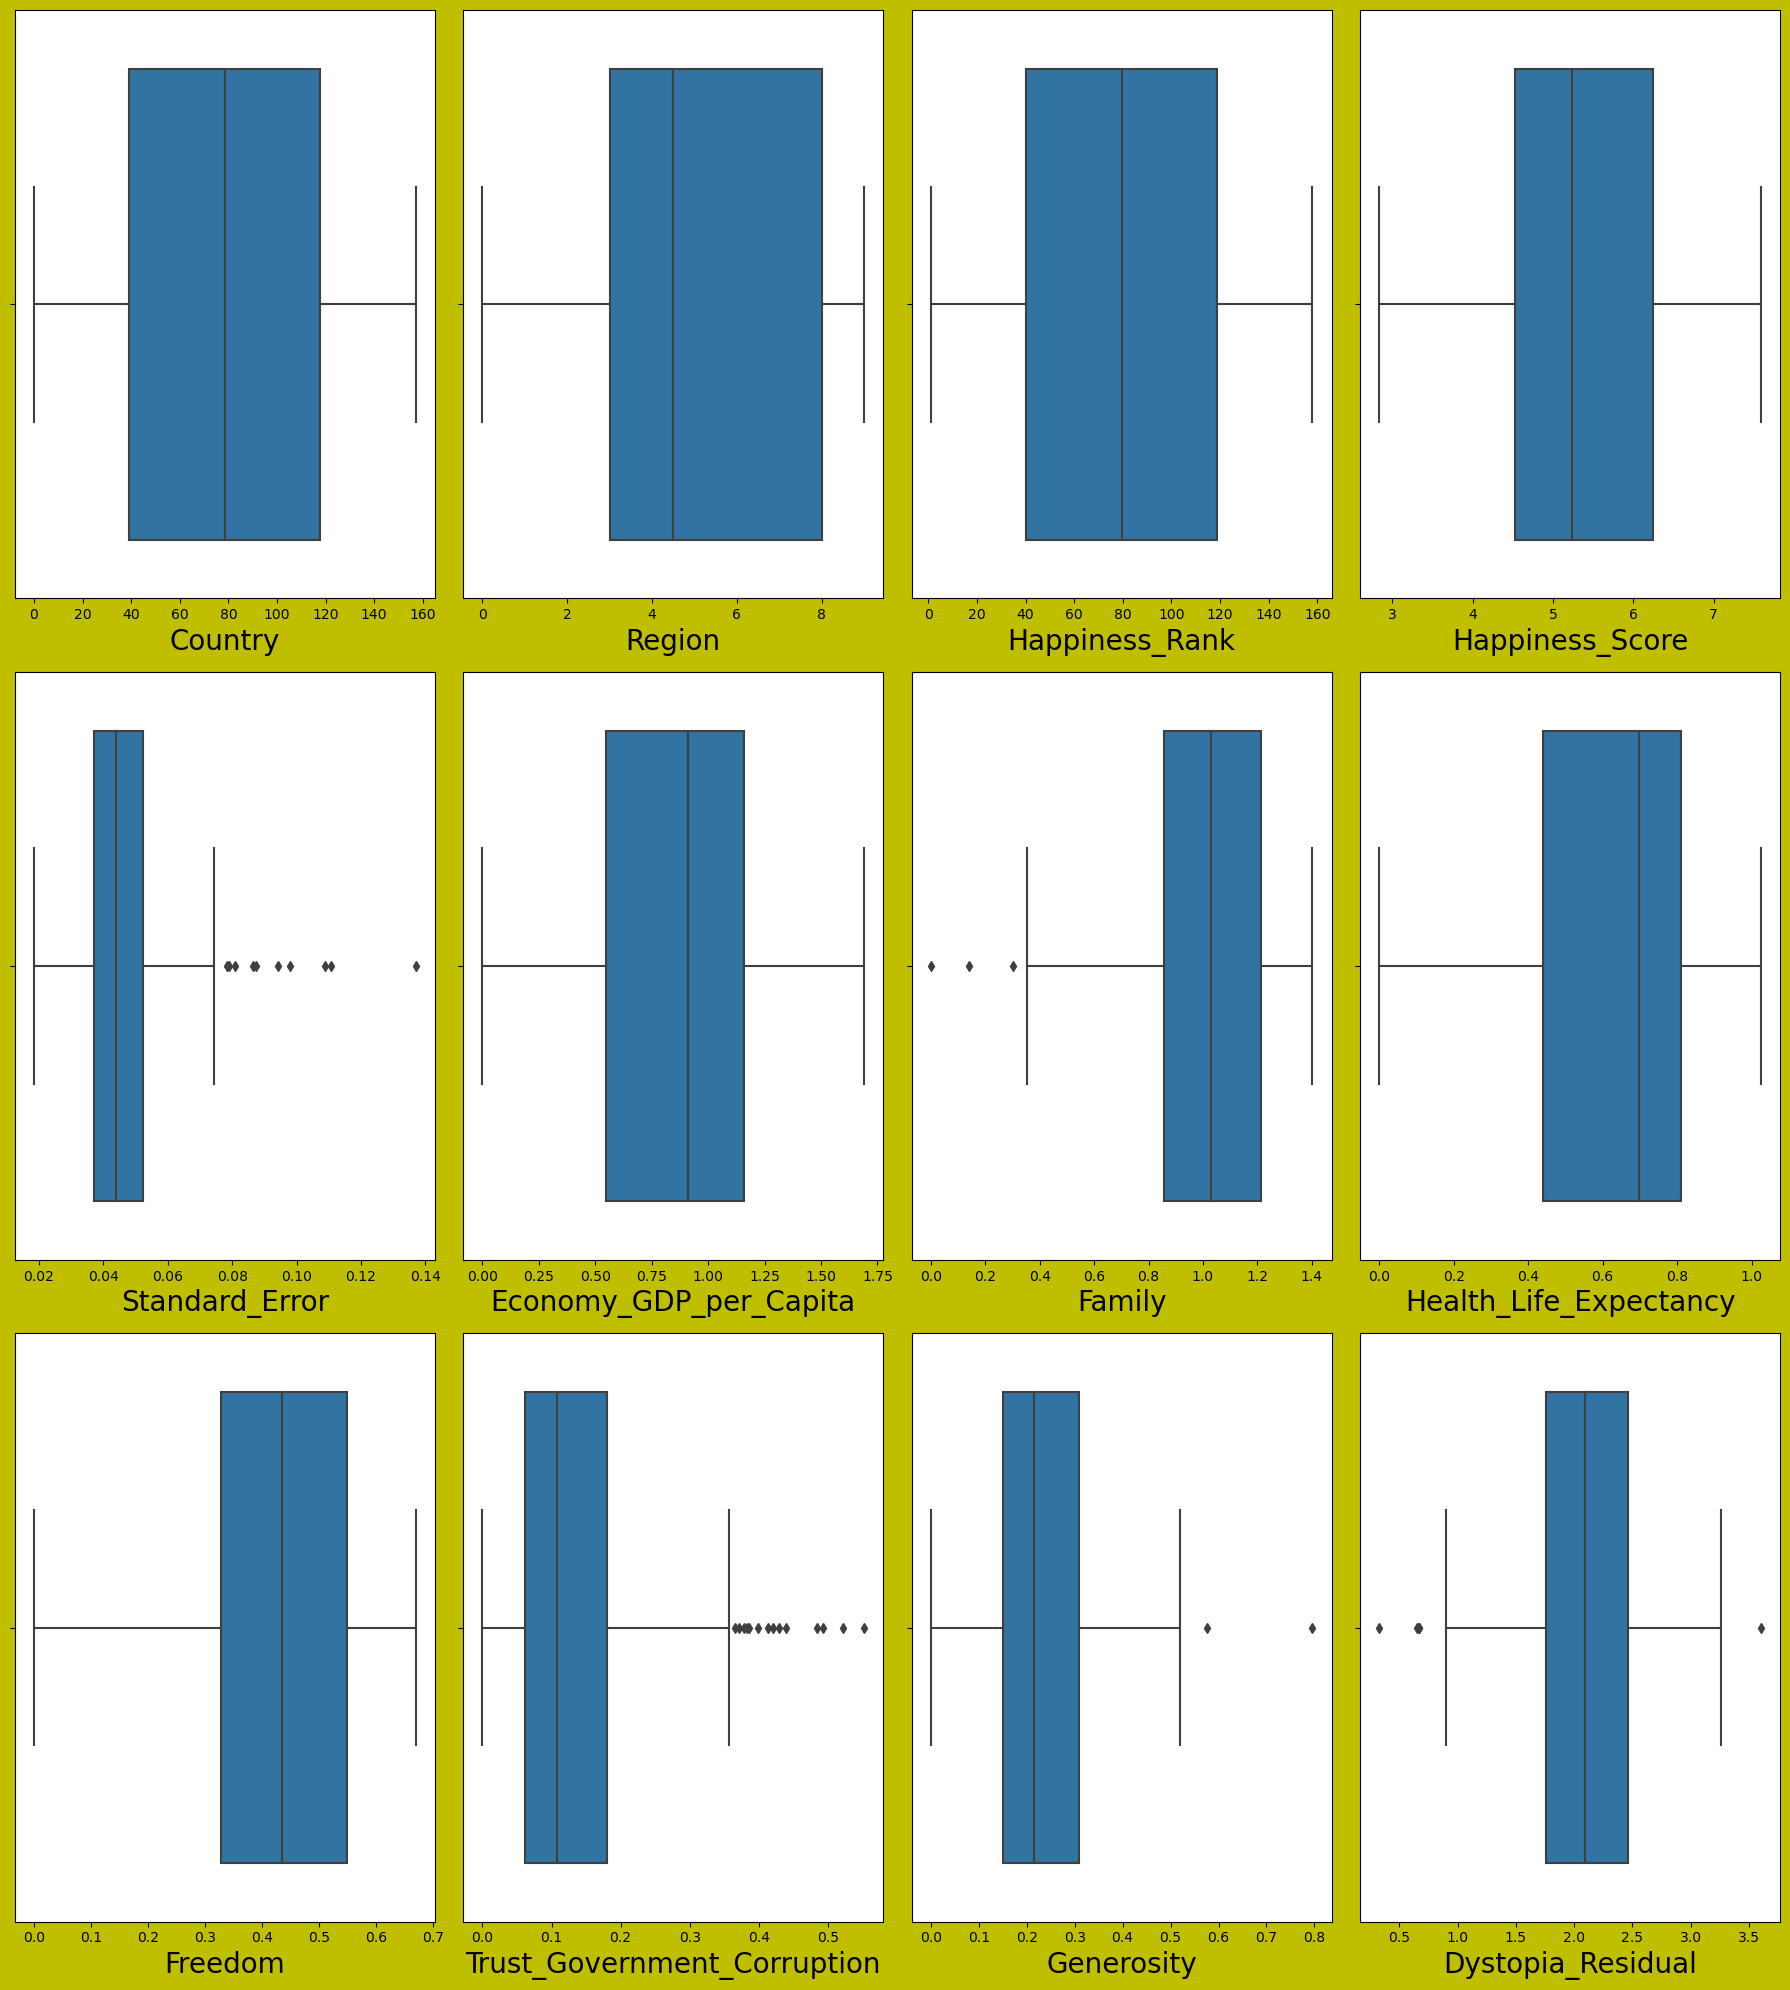

In [18]:
plt.figure(figsize=(18,20),facecolor="y")
plot=1
for i in data:
    if plot<=12:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [19]:
data.skew()

Country                        0.000000
Region                        -0.116119
Happiness_Rank                 0.000418
Happiness_Score                0.097769
Standard_Error                 1.983439
Economy_GDP_per_Capita        -0.317575
Family                        -1.006893
Health_Life_Expectancy        -0.705328
Freedom                       -0.413462
Trust_Government_Corruption    1.385463
Generosity                     1.001961
Dystopia_Residual             -0.238911
dtype: float64

In [20]:
q1=data.quantile(.25)
q2=data.quantile(.50)
q3=data.quantile(.75)

In [21]:
iqr=q3-q1

In [22]:
q1


Country                        39.250000
Region                          3.000000
Happiness_Rank                 40.250000
Happiness_Score                 4.526000
Standard_Error                  0.037268
Economy_GDP_per_Capita          0.545808
Family                          0.856823
Health_Life_Expectancy          0.439185
Freedom                         0.328330
Trust_Government_Corruption     0.061675
Generosity                      0.150553
Dystopia_Residual               1.759410
Name: 0.25, dtype: float64

In [23]:
q3






Country                        117.750000
Region                           8.000000
Happiness_Rank                 118.750000
Happiness_Score                  6.243750
Standard_Error                   0.052300
Economy_GDP_per_Capita           1.158448
Family                           1.214405
Health_Life_Expectancy           0.811013
Freedom                          0.549092
Trust_Government_Corruption      0.180255
Generosity                       0.309883
Dystopia_Residual                2.462415
Name: 0.75, dtype: float64

In [24]:
iqr

Country                        78.500000
Region                          5.000000
Happiness_Rank                 78.500000
Happiness_Score                 1.717750
Standard_Error                  0.015032
Economy_GDP_per_Capita          0.612640
Family                          0.357582
Health_Life_Expectancy          0.371828
Freedom                         0.220762
Trust_Government_Corruption     0.118580
Generosity                      0.159330
Dystopia_Residual               0.703005
dtype: float64

In [25]:
se_high=q3.Standard_Error+(1.5*iqr.Standard_Error)
ind_num=np.where(data['Standard_Error']>se_high)
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(148, 12)

In [26]:
fm_high=q3.Family-(1.5*iqr.Family)
ind_num=np.where(fm_high>data["Family"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(130, 12)

In [27]:
tr_high=q3.Trust_Government_Corruption+(1.5*iqr.Trust_Government_Corruption)
ind_num=np.where(tr_high<data["Trust_Government_Corruption"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(117, 12)

In [28]:
ge_high=q3.Generosity+(1.5*iqr.Generosity)
ind_num=np.where(ge_high<data["Generosity"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(115, 12)

In [29]:
data.skew()

Country                        0.069124
Region                         0.167719
Happiness_Rank                 0.103294
Happiness_Score                0.149933
Standard_Error                 0.506816
Economy_GDP_per_Capita        -0.534047
Family                        -0.174124
Health_Life_Expectancy        -0.939678
Freedom                       -0.471309
Trust_Government_Corruption    0.957003
Generosity                     0.763415
Dystopia_Residual              0.192126
dtype: float64

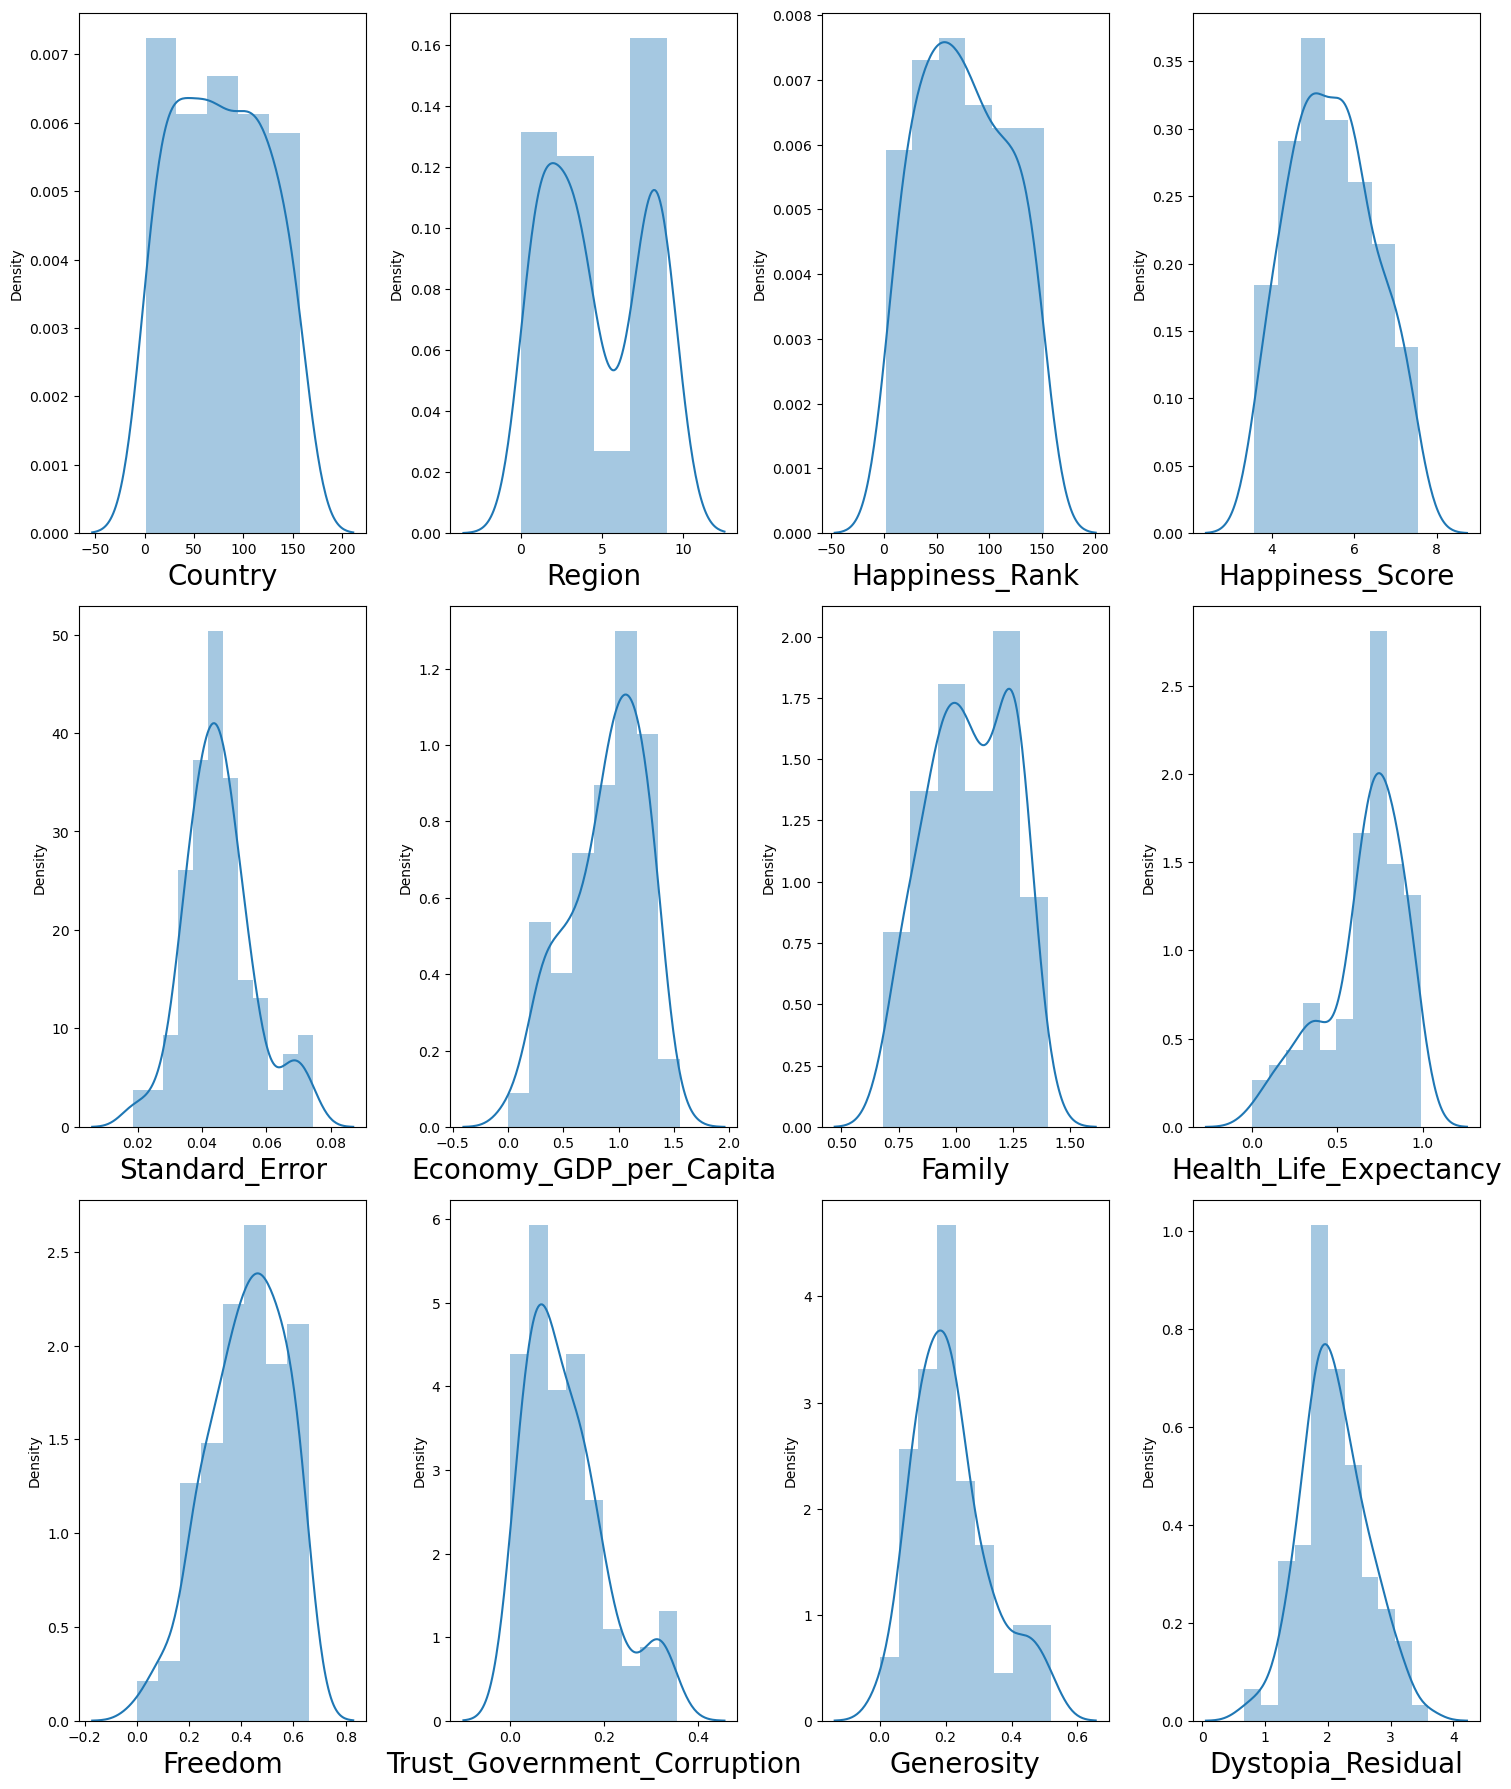

In [30]:
plt.figure(figsize=(15,18),facecolor="w")
graph=1
for i in data:
    if graph<=13:
        ax=plt.subplot(3,4,graph)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    graph+=1
plt.tight_layout()

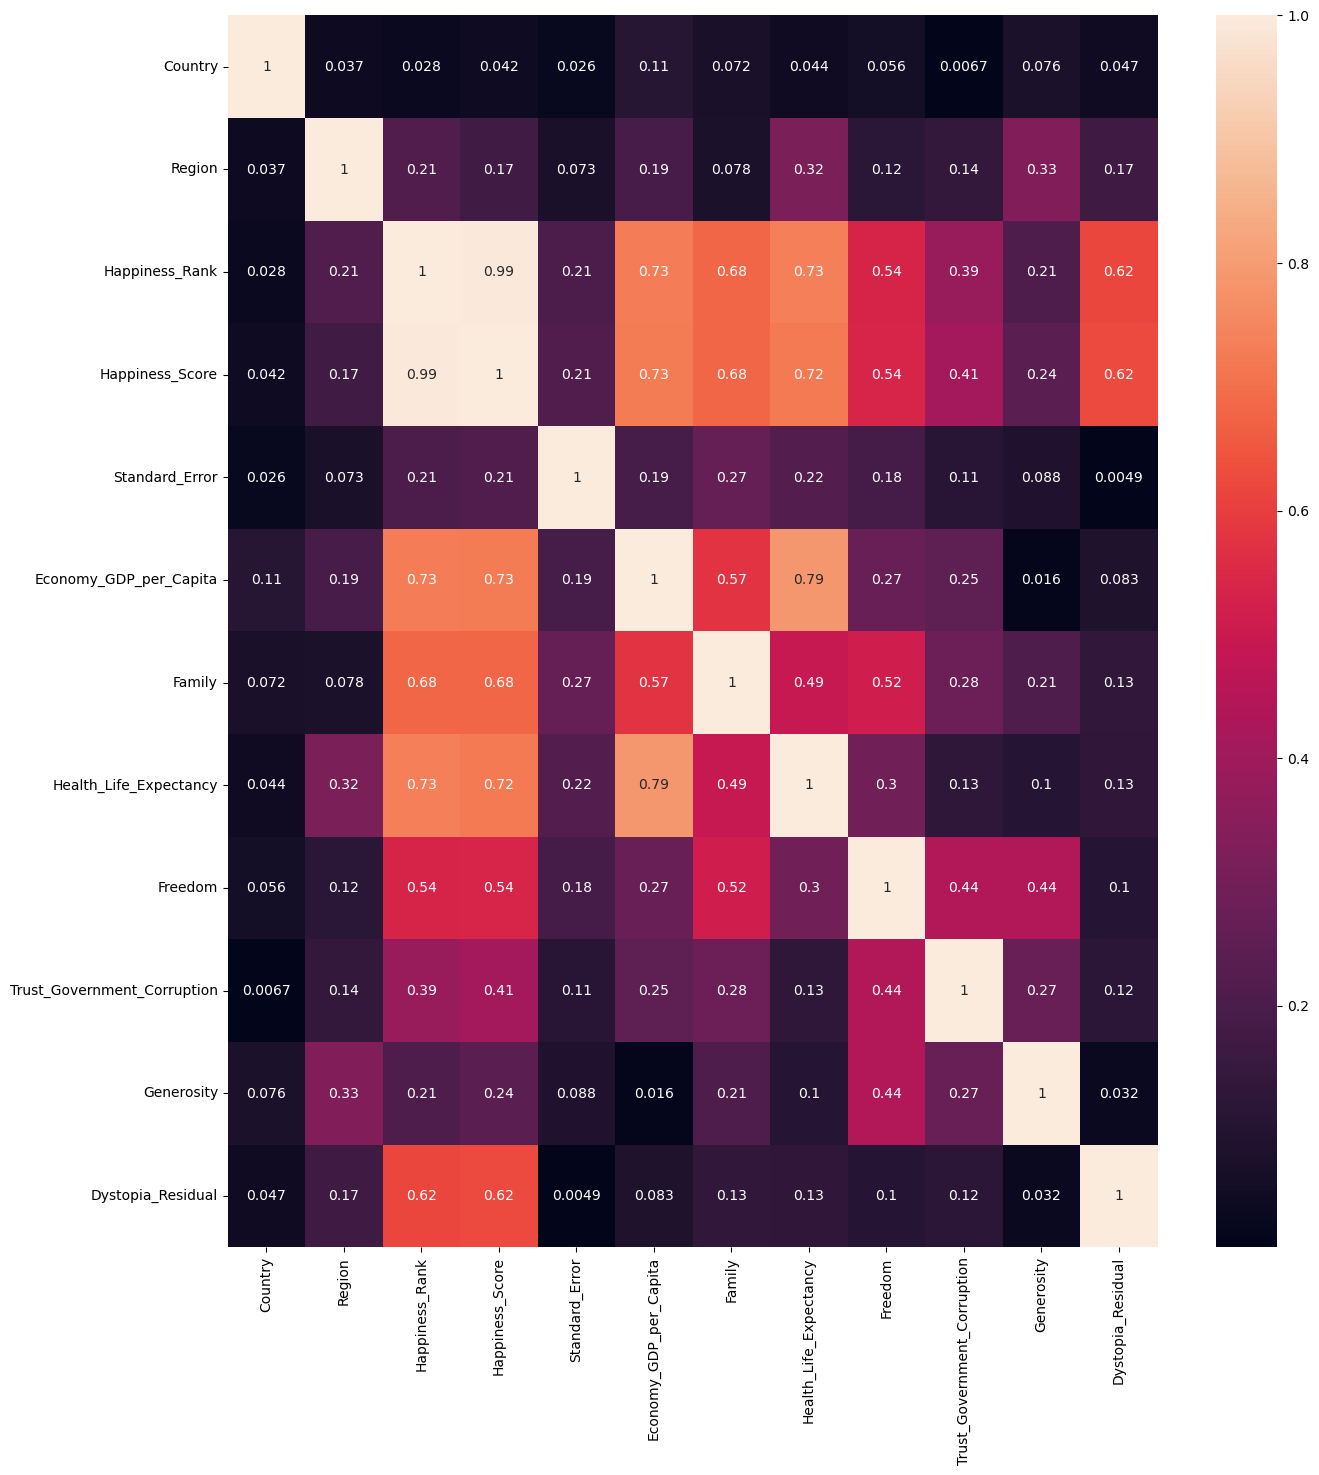

In [31]:
data_corr=data.corr().abs()
plt.figure(figsize=(15,16))
sns.heatmap(data_corr,annot=True,annot_kws={"size":10},linecolor='black')
plt.show()

In [32]:
data_corr["Happiness_Score"].sort_values(ascending=False)

Happiness_Score                1.000000
Happiness_Rank                 0.993134
Economy_GDP_per_Capita         0.726099
Health_Life_Expectancy         0.720213
Family                         0.679431
Dystopia_Residual              0.624531
Freedom                        0.539728
Trust_Government_Corruption    0.407418
Generosity                     0.241881
Standard_Error                 0.211437
Region                         0.174058
Country                        0.041863
Name: Happiness_Score, dtype: float64

In [33]:
data.drop(columns="Happiness_Rank",inplace=True)

In [34]:
data.columns

Index(['Country', 'Region', 'Happiness_Score', 'Standard_Error',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [35]:
corr=data.corr()
corr

,Country,Region,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
Country,1.000000,0.037457,-0.041863,-0.026276,-0.106309,0.072466,-0.044415,0.055526,-0.006693,0.076297,-0.047027
Region,0.037457,1.000000,-0.174058,-0.072559,-0.191681,-0.077650,-0.316686,0.115072,0.138994,0.330947,-0.171192
Happiness_Score,-0.041863,-0.174058,1.000000,-0.211437,0.726099,0.679431,0.720213,0.539728,0.407418,0.241881,0.624531
Standard_Error,-0.026276,-0.072559,-0.211437,1.000000,-0.189572,-0.265726,-0.220762,-0.184198,-0.111170,-0.088118,-0.004920
Economy_GDP_per_Capita,-0.106309,-0.191681,0.726099,-0.189572,1.000000,0.573596,0.788145,0.272340,0.248299,-0.016063,0.082942
Family,0.072466,-0.077650,0.679431,-0.265726,0.573596,1.000000,0.494418,0.515967,0.278553,0.209170,0.133847
Health_Life_Expectancy,-0.044415,-0.316686,0.720213,-0.220762,0.788145,0.494418,1.000000,0.296108,0.128126,0.103101,0.131496
Freedom,0.055526,0.115072,0.539728,-0.184198,0.272340,0.515967,0.296108,1.000000,0.441443,0.443186,0.102176
Trust_Government_Corruption,-0.006693,0.138994,0.407418,-0.111170,0.248299,0.278553,0.128126,0.441443,1.000000,0.271027,0.120919
Generosity,0.076297,0.330947,0.241881,-0.088118,-0.016063,0.209170,0.103101,0.443186,0.271027,1.000000,-0.031692


In [36]:


corr["Happiness_Score"].sort_values(ascending=False)

Happiness_Score                1.000000
Economy_GDP_per_Capita         0.726099
Health_Life_Expectancy         0.720213
Family                         0.679431
Dystopia_Residual              0.624531
Freedom                        0.539728
Trust_Government_Corruption    0.407418
Generosity                     0.241881
Country                       -0.041863
Region                        -0.174058
Standard_Error                -0.211437
Name: Happiness_Score, dtype: float64

In [37]:
x=data.drop(columns="Happiness_Score")
y=data.Happiness_Score

In [38]:
x.shape

(115, 10)

In [39]:
y.shape

(115,)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
x_scaled=scaler.fit_transform(x)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif=pd.DataFrame()

In [45]:
vif["vif_val"]=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["feature"]=x.columns
vif

,vif_val,feature
0,1.046756,Country
1,1.408956,Region
2,1.117212,Standard_Error
3,3.615978,Economy_GDP_per_Capita
4,2.000937,Family
5,3.378447,Health_Life_Expectancy
6,1.818603,Freedom
7,1.369561,Trust_Government_Corruption
8,1.534312,Generosity
9,1.076761,Dystopia_Residual


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=21)

In [48]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [49]:
lre.fit(x_train,y_train)

LinearRegression()

In [57]:
from sklearn.metrics import r2_score,roc_curve,roc_auc_score

In [52]:
pred_test=lre.predict(x_test)

In [53]:
r2_score(y_test,pred_test)

0.9999999359964629

In [62]:
train_pred=lre.predict(x_train)

In [63]:
r2_score(y_train,train_pred)

0.999999928115221

In [64]:
lre.score(x_test,y_test)

0.9999999359964629

In [67]:
lre.score(x_train,y_train)

0.999999928115221

In [69]:
import joblib
joblib.dump(lre,"human_happyness.pkl")

['human_happyness.pkl']

In [71]:
model=joblib.load("human_happyness.pkl")
prediction=model.predict(x_test)
prediction

array([5.94807043, 5.85525952, 4.78796729, 7.18720213, 4.63332314,
       5.47691889, 4.50719203, 5.12874929, 5.25290124, 5.88986057,
       5.60473601, 6.57421929, 4.8743733 , 6.48506369, 5.68855816,
       4.68075846, 4.07651262, 5.71587304, 6.85286079, 4.34999547,
       6.93735839, 6.41103005, 5.19228136, 3.93078228, 4.7996791 ,
       6.29802963, 5.88905116, 7.28422464, 6.6697742 ])

In [72]:
a=np.array(y_test)
df=pd.DataFrame()
df["predicted"]=prediction
df["original"]=a
df

,predicted,original
0,5.948070,5.948
1,5.855260,5.855
2,4.787967,4.788
3,7.187202,7.187
4,4.633323,4.633
5,5.476919,5.477
6,4.507192,4.507
7,5.128749,5.129
8,5.252901,5.253
9,5.889861,5.890
